# Test 2 SOM on Kepler and TESS Data

The second test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out a under-sampling to balance the dataset, with all the characteristics and initializing the weights of the SOM with 50% composed of values ​​of Planets taken randomly, and 50% False Planets.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [64]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [65]:
X_train = X_train.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns='Unnamed: 0')

In [66]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [67]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag']

In [68]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 17)
Shape of y_train: (10804, 1)


In [69]:
X_train = X_train.values
y_train = y_train.values

In [70]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  17


# Grid Search

In [71]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [1],
    'W_FALSE_PLANET': [1],
    'K': [7, 11]
}

In [72]:
# grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
# best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

# print("Best param:", best_param)
# print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 15, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f3085ffeca0>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f3085ffeca0>,
# 'W_PLANET': 1, 'W_FALSE_PLANET': 1, 'K': 7}
# Best accuracy: 0.7653863951874132

In [73]:
best_param = {}
best_param['W'] = None
best_param['max_iter'] = 100000
best_param['num_rows'] = 30
best_param['num_cols'] = 30
best_param['max_learning_rate'] = 0.8
best_param['max_distance'] = 10
best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
best_param['distance_nr'] = DistanceMetrics.euclidean_distance
best_param['W_PLANET'] = 1
best_param['W_FALSE_PLANET'] = 1
best_param['K'] = 7

In [74]:
W = best_param['W']
max_iter = 100000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [75]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000003  | LR:    0.800000  | NR:   10.000000  | Time:    0.016462


Iteration:  01000  | QE:    0.000008  | LR:    0.792008  | NR:   10.000000  | Time:    9.408951
Iteration:  02000  | QE:    0.000015  | LR:    0.784008  | NR:   10.000000  | Time:    9.526253
Iteration:  03000  | QE:    0.000006  | LR:    0.776008  | NR:   10.000000  | Time:   10.880947
Iteration:  04000  | QE:    0.000007  | LR:    0.768008  | NR:   10.000000  | Time:   10.628462
Iteration:  05000  | QE:    0.000010  | LR:    0.760008  | NR:   10.000000  | Time:   10.960817
Iteration:  06000  | QE:    0.000020  | LR:    0.752008  | NR:   10.000000  | Time:   10.965586
Iteration:  07000  | QE:    0.000005  | LR:    0.744008  | NR:   10.000000  | Time:   10.289907
Iteration:  08000  | QE:    0.000004  | LR:    0.736008  | NR:   10.000000  | Time:   16.261816
Iteration:  09000  | QE:    0.000004  | LR:    0.728008  | NR:   10.000000  | Time:   12.979984
Iteration:  10000  | QE:    0.000046  | LR:    0.720008  | NR:   10.000000  | Time:   11.305809
Iteration:  11000  | QE:    0.000025  | 

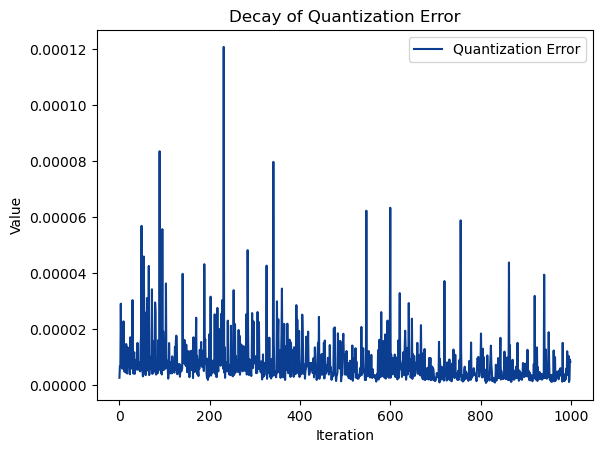

In [76]:
REDUCE = 100
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

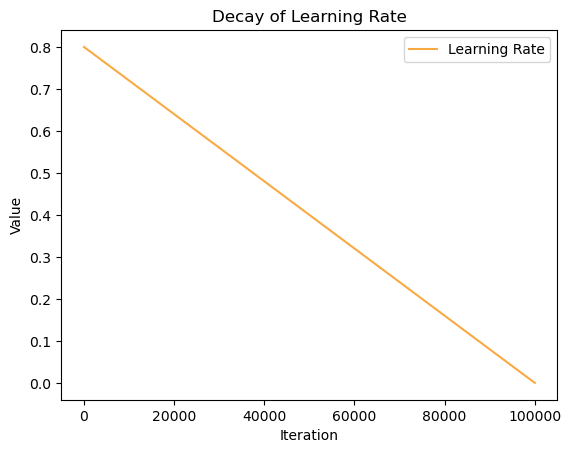

In [77]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

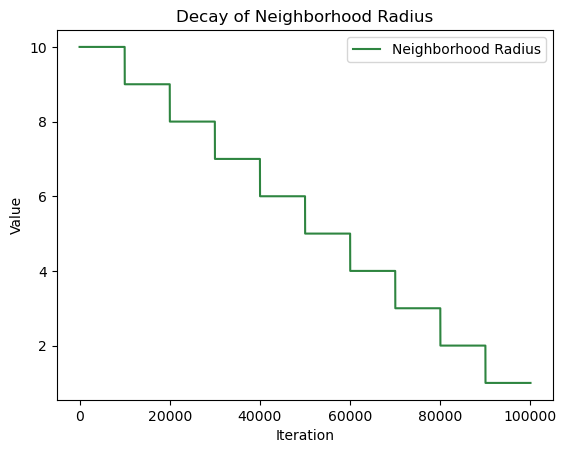

In [78]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

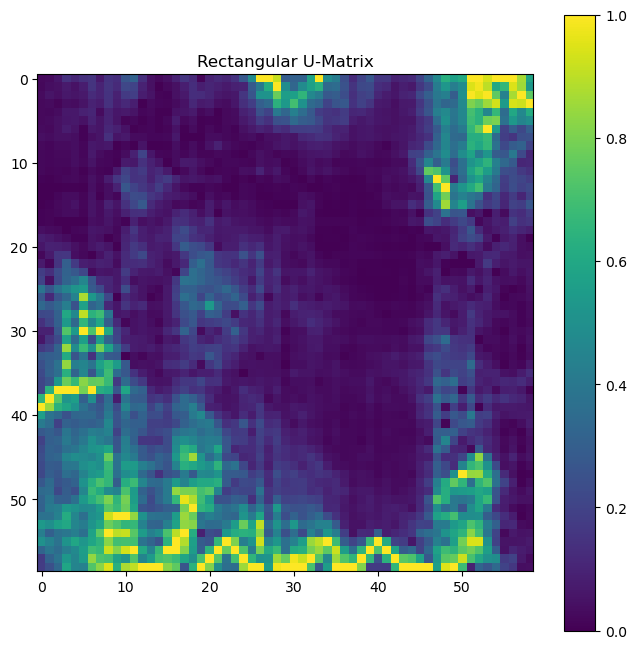

In [79]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

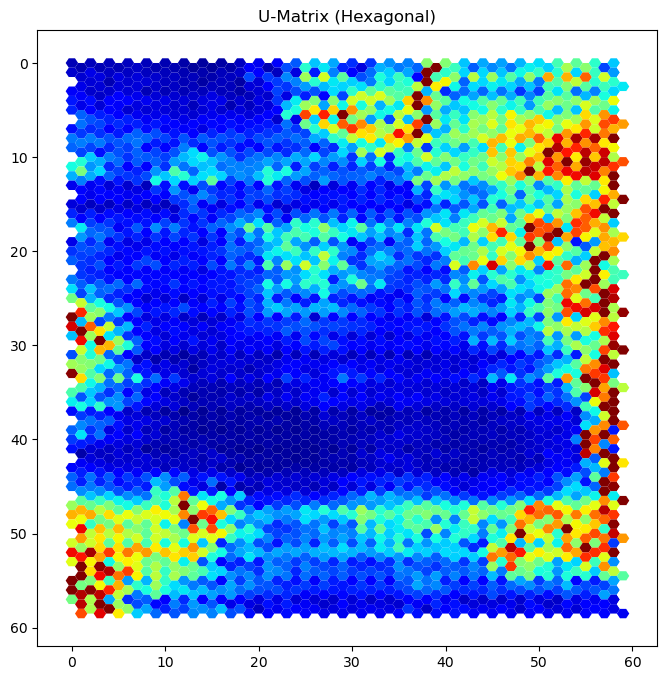

In [80]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

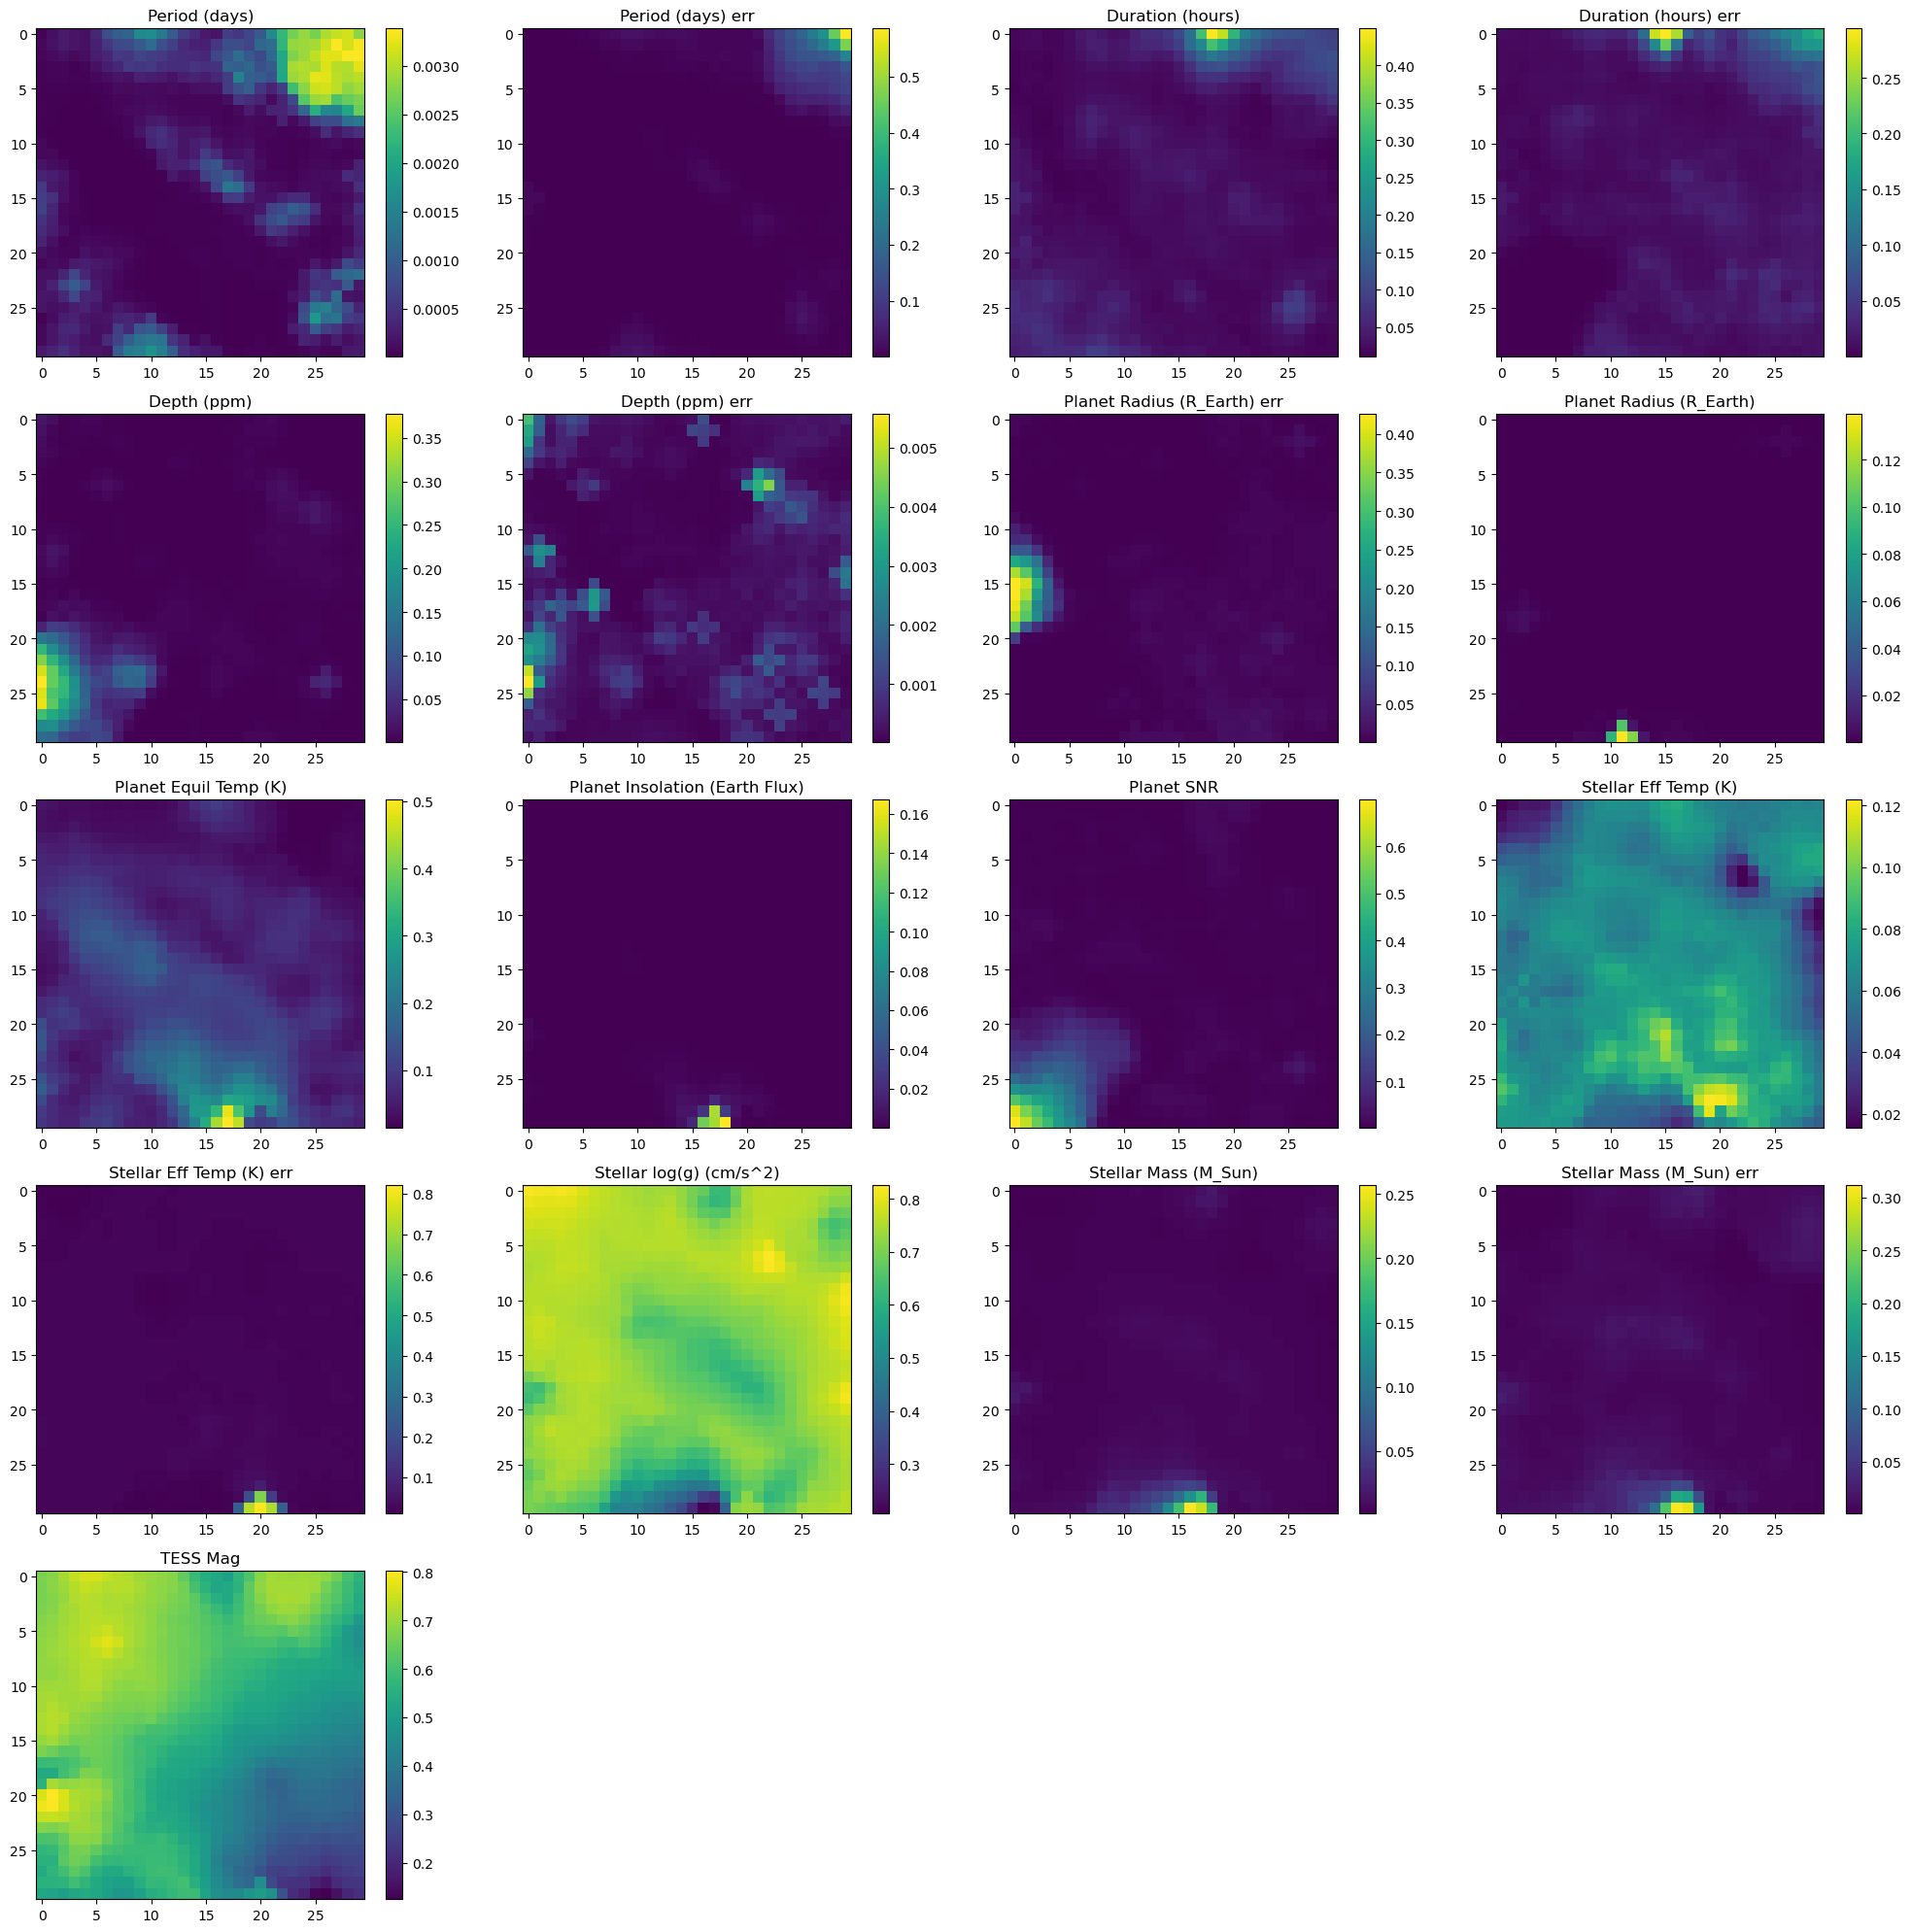

In [81]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [82]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(26, 0) -> Planet:   0, False Planet:  10
(10, 5) -> Planet:   0, False Planet:  16
(15, 28)-> Planet:  14, False Planet:   0
(18, 26)-> Planet:   0, False Planet:  18
(10, 9) -> Planet:  10, False Planet:   0
(29, 6) -> Planet:   0, False Planet:  10
(23, 5) -> Planet:   0, False Planet:  15
(8, 14) -> Planet:   6, False Planet:   0
(14, 4) -> Planet:   6, False Planet:   0
(21, 10)-> Planet:   0, False Planet:   4
(0, 18) -> Planet:   0, False Planet:  10
(17, 24)-> Planet:  16, False Planet:   0
(4, 9)  -> Planet:  18, False Planet:   0
(27, 7) -> Planet:   0, False Planet:   6
(20, 22)-> Planet:  14, False Planet:   0
(5, 28) -> Planet:   0, False Planet:   7
(13, 17)-> Planet:   5, False Planet:   0
(20, 12)-> Planet:   0, False Planet:  21
(13, 21)-> Planet:  12, False Planet:   0
(10, 26)-> Planet:  16, False Planet:   0
(6, 11) -> Planet:  10, False Planet:   0
(13, 1) -> Planet:   0, False Planet:   8
(19, 28)-> Planet:   6, False Planet:   0
(9, 9)  -> Planet:  12, False Plan

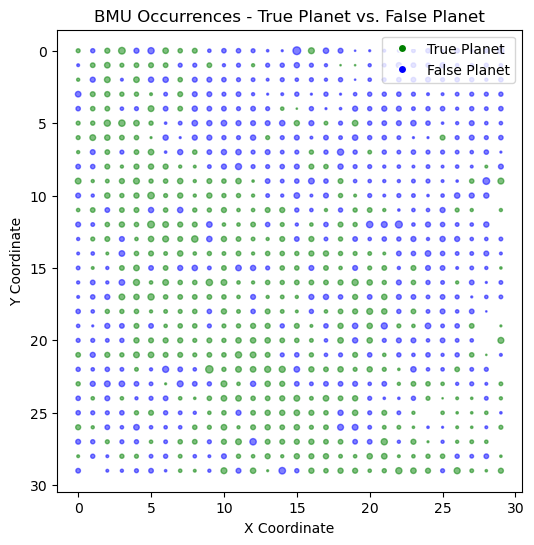

In [83]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [84]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

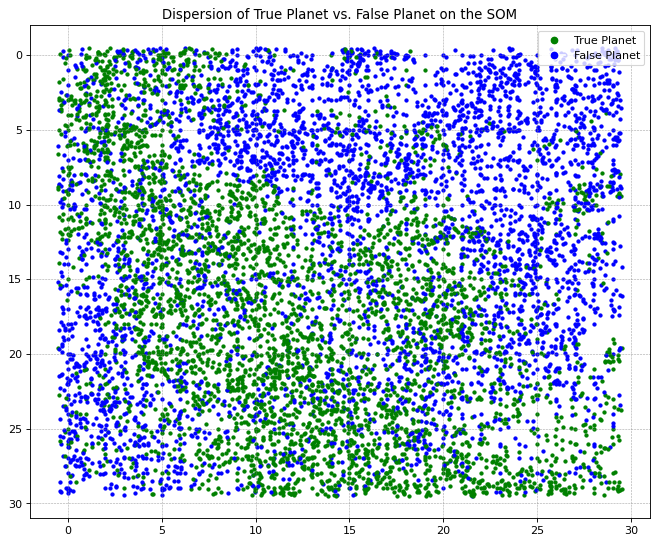

In [85]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

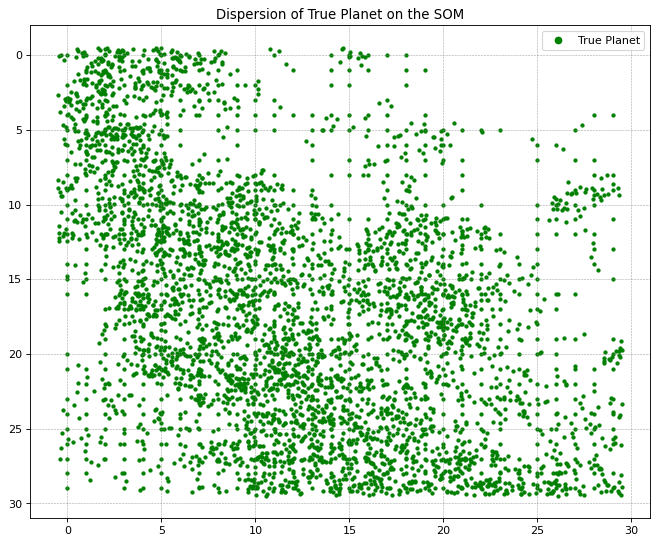

In [86]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

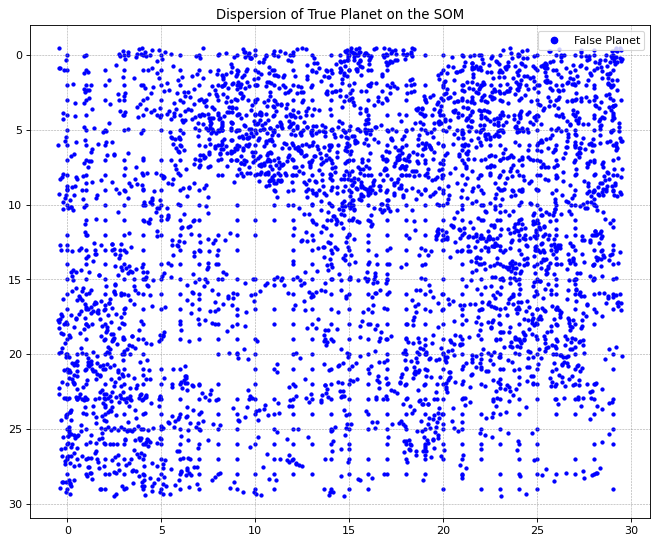

In [87]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

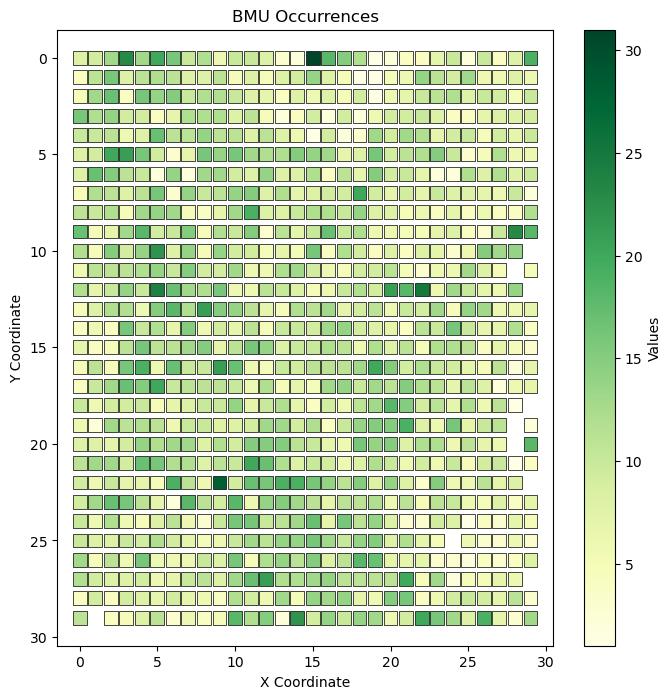

In [88]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

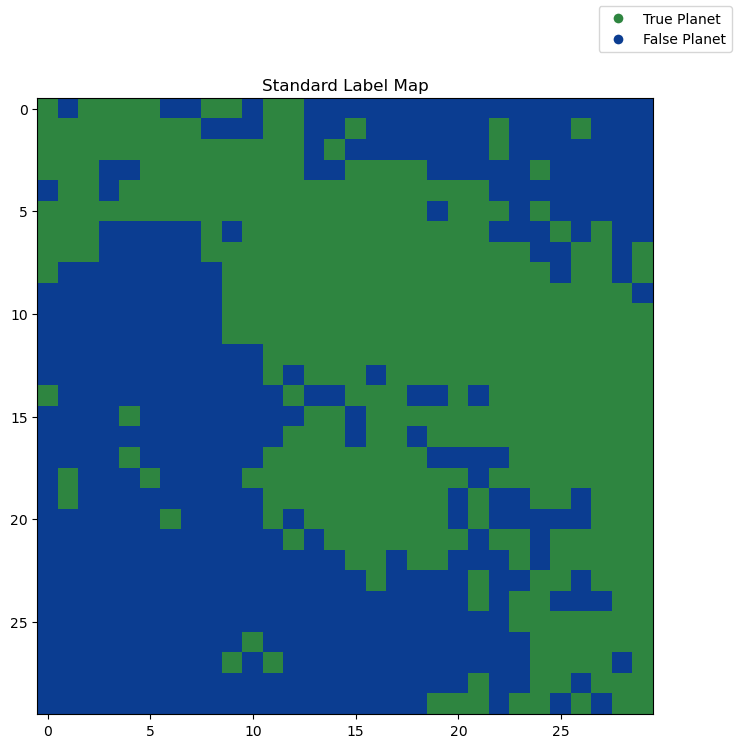

In [89]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

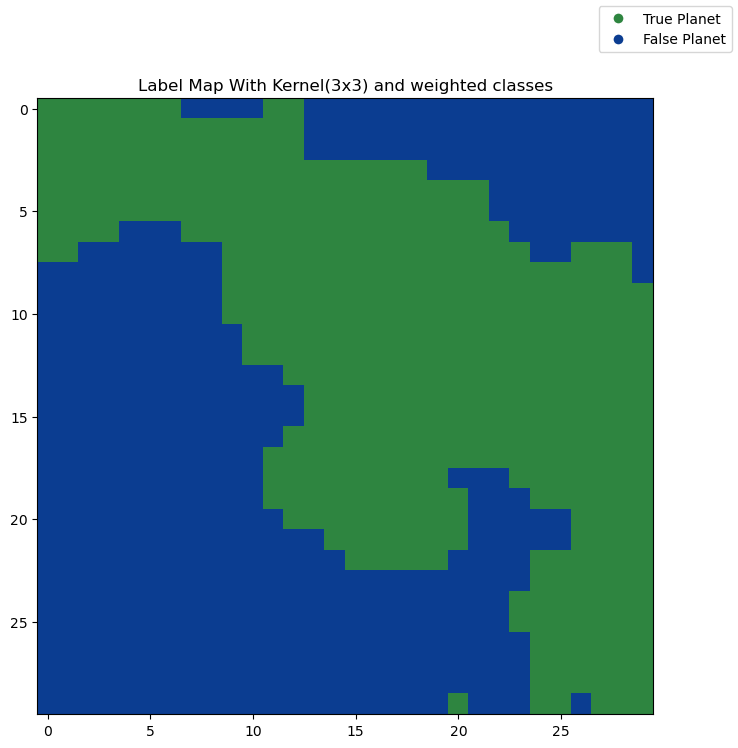

In [90]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

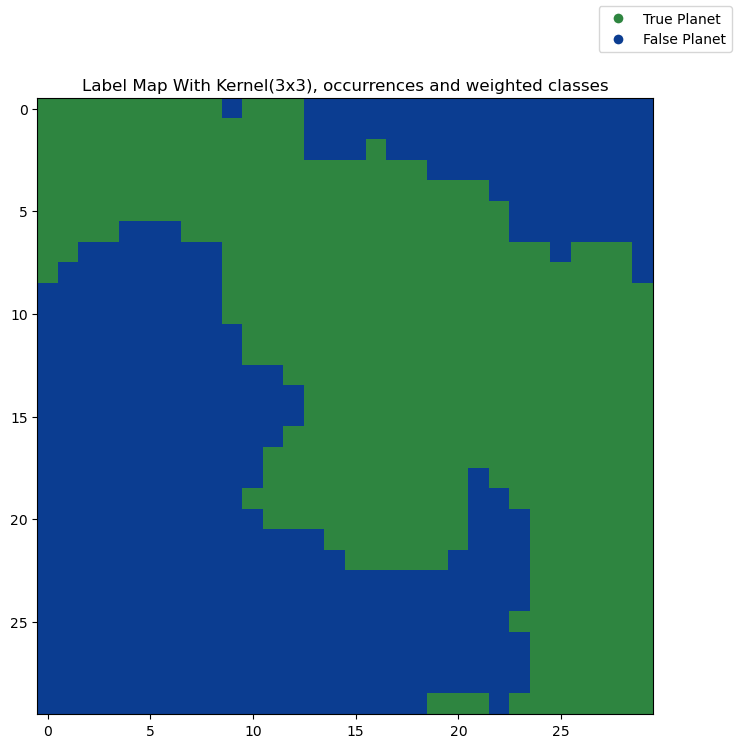

In [91]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7700138824618232
F1-score: 0.7828746177370031
Precision: 0.7308319738988581
Recall: 0.8428974600188147
cm:  [[768 330]
 [167 896]]


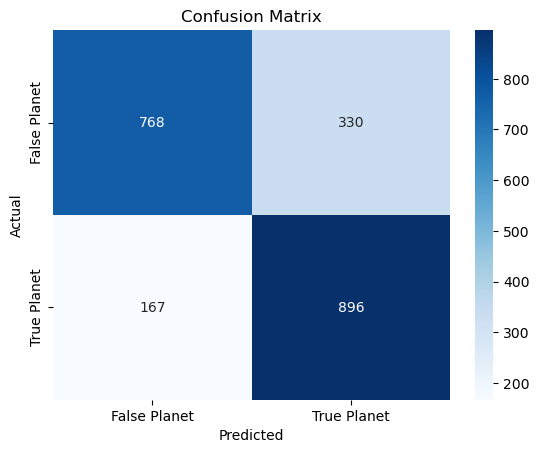

In [92]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7704766311892642
F1-score: 0.7803365810451729
Precision: 0.7372384937238494
Recall: 0.8287864534336783
cm:  [[784 314]
 [182 881]]


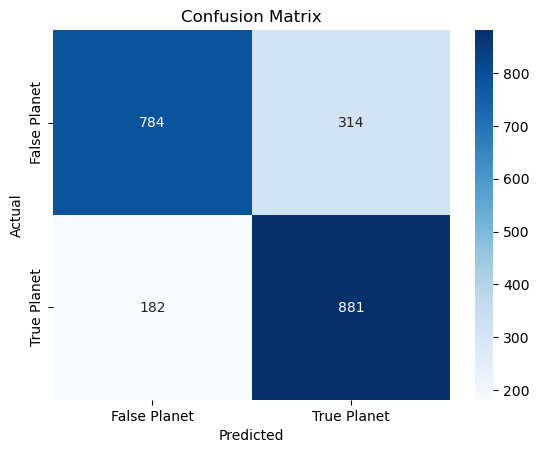

In [93]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7686256362795002
F1-score: 0.7814685314685315
Precision: 0.7297959183673469
Recall: 0.8410159924741298
cm:  [[767 331]
 [169 894]]


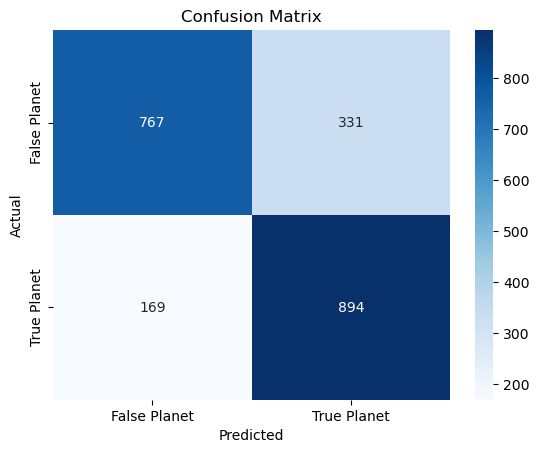

In [94]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7635354002776492
F1-score: 0.7771478412559963
Precision: 0.724390243902439
Recall: 0.8381937911571026
cm:  [[759 339]
 [172 891]]


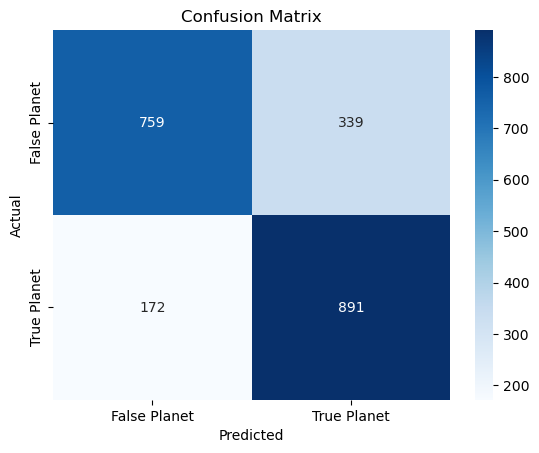

In [95]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)